## Data Reading

### Importing necessary Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [117]:
!pip install nltk

In [35]:
df = pd.read_csv('spam.csv', encoding='latin1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
df.shape

(5572, 5)

In [38]:
# We can see non null values are only 50 and lesser in last 3 column so remove them

df = df.drop(df[['Unnamed: 2','Unnamed: 3', 'Unnamed: 4']], axis = 1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
## Rename the Columns
df = df.rename(columns = {'v1' : 'target', 'v2': 'text'})

In [40]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [41]:
#  we have two sets ham and spam, we'd simply convert them into binary numerics 0 and 1

df['target'] = df['target'].map({'spam':1, 'ham': 0})
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [42]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
## The initial dataset

## Data Cleaning

###  Missing values

In [18]:
df.isna().sum()

target    0
text      0
dtype: int64

###  Duplicated Values

In [43]:
df.duplicated().sum()

403

In [44]:
df = df.drop_duplicates()

In [45]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [25]:
## Checking whether the dataset is a balanced dataset or unbalanced

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
# 4500 --> 0s, and oly 650 --> 1s 
# 4500 --> hams and only 650 --> spams

# unbalanced dataset

### Pie chart for Spam and Ham distribution

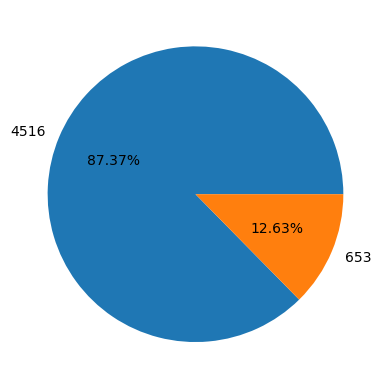

In [27]:
target_value_counts = df['target'].value_counts()
plt.pie(df['target'].value_counts(),labels= target_value_counts, autopct='%0.2f%%')
plt.show()

## Data Preprocessing

### Tokenization

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
## This is done to get an overview/insights about how many are in spam and how many in ham

In [54]:
df['Num_chars'] = df['text'].apply(len)

In [55]:
df.head()

,target,text,Num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
df['Num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [57]:
df['Num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [58]:
df.head()

,target,text,Num_chars,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Histogram for all three characters, words, and sentences for BOTH hams and spams

<Axes: xlabel='Num_chars', ylabel='Count'>

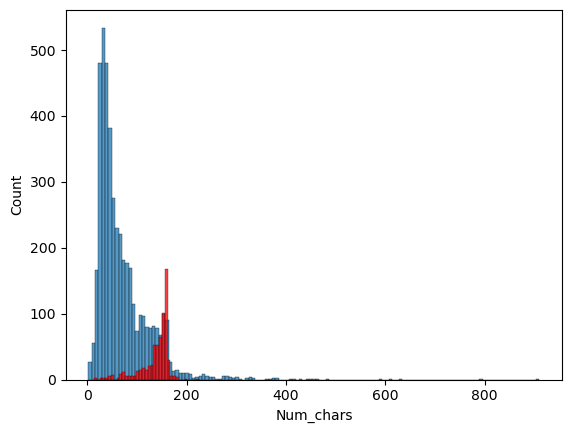

In [59]:
## Characters count

# Hams
sns.histplot(df[df['target'] == 0]['Num_chars'])
## spam
sns.histplot(df[df['target'] == 1]['Num_chars'], color = 'Red')

<Axes: xlabel='Num_words', ylabel='Count'>

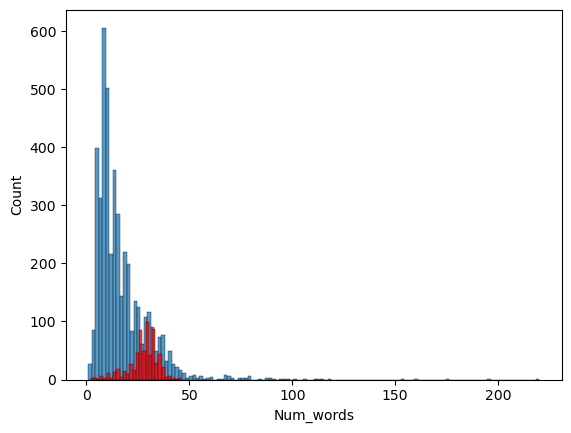

In [60]:
##  words count

# Hams
sns.histplot(df[df['target'] == 0]['Num_words'])
## spam
sns.histplot(df[df['target'] == 1]['Num_words'], color = 'Red')

<Axes: xlabel='Num_sentences', ylabel='Count'>

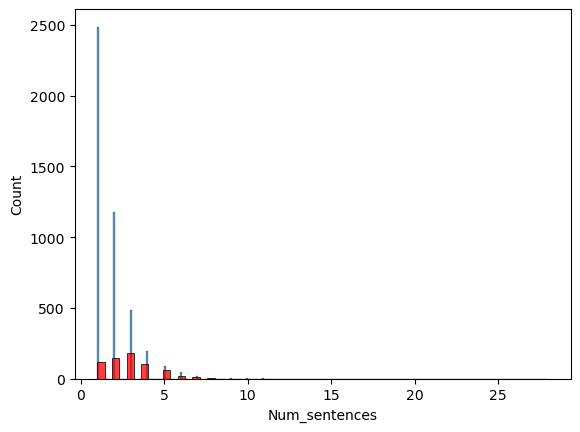

In [42]:
## plot for sentences count

# Hams
sns.histplot(df[df['target'] == 0]['Num_sentences'])
## spam
sns.histplot(df[df['target'] == 1]['Num_sentences'], color = 'Red')

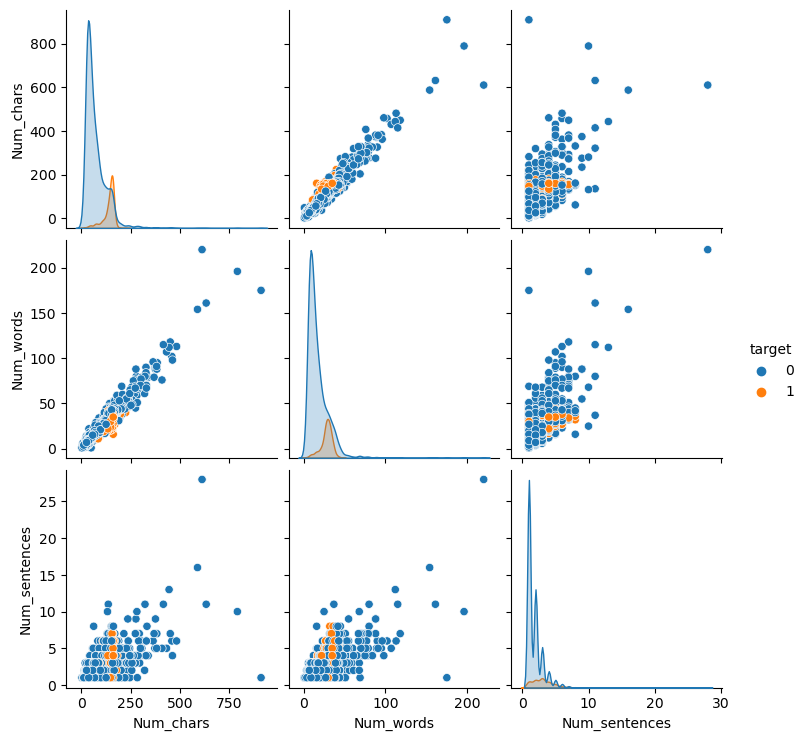

In [61]:
sns.pairplot(df, hue = 'target')

C:\Users\HP\AppData\Local\Temp\ipykernel_7608\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

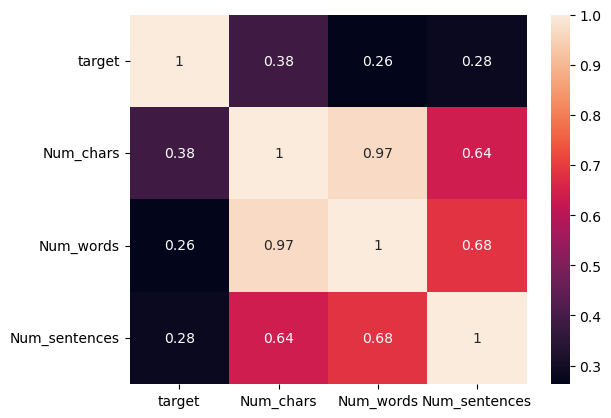

In [45]:
sns.heatmap(df.corr(),annot=True)

'''
we will do :
       Lower case
       Tokenization
       removing special characters
       Removing stop words and punctuations
       Stemming
       
'''

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
## lower case done
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)          ## Tokenization
     
    
    y=[]                       ### removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [64]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [65]:
## stopwords weren't installing from nltk so downloaded the packet

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
## for stop words

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
## punctuations

import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
## Now write code to run a loop on the text and find punctutaions and stop words and put all others in a variable 'y'

In [69]:
transform_text('Hi loving is, how3! %% are you ?')


## from the output of this code snippet we can see that stop words and punctuations are removed, Lower case too, all good

'hi love how3'

In [70]:
 df['transformed_text'] = df['text'].apply(transform_text)

In [55]:
df.head()

,target,text,Num_chars,Num_words,Num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
df['transformed_text'][10]

'gon na home soon want talk stuff anymor tonight k cri enough today'

### Word CLoud

In [72]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=5,  background_color='black')
wc

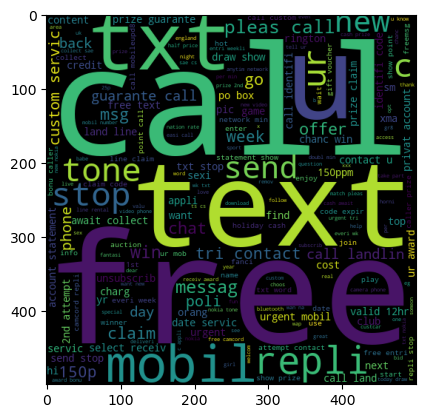

In [73]:
## Spam messages word cloud plot

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =" "))
plt.imshow(spam_wc)

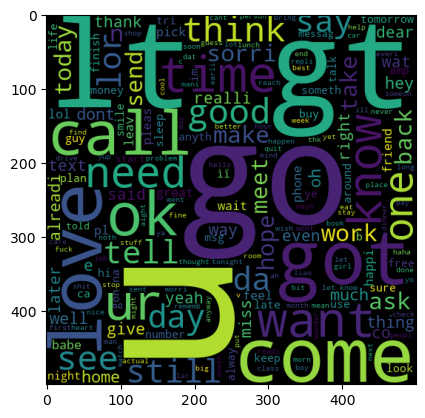

In [74]:
## Ham messages word cloud plot

spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =" "))
plt.imshow(spam_wc)

### Top 30 words used in Spam Messages

In [76]:
df[df['target']==1]        ## only spam messages

,target,text,Num_chars,Num_words,Num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [77]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [78]:
len(spam_corpus)

9939

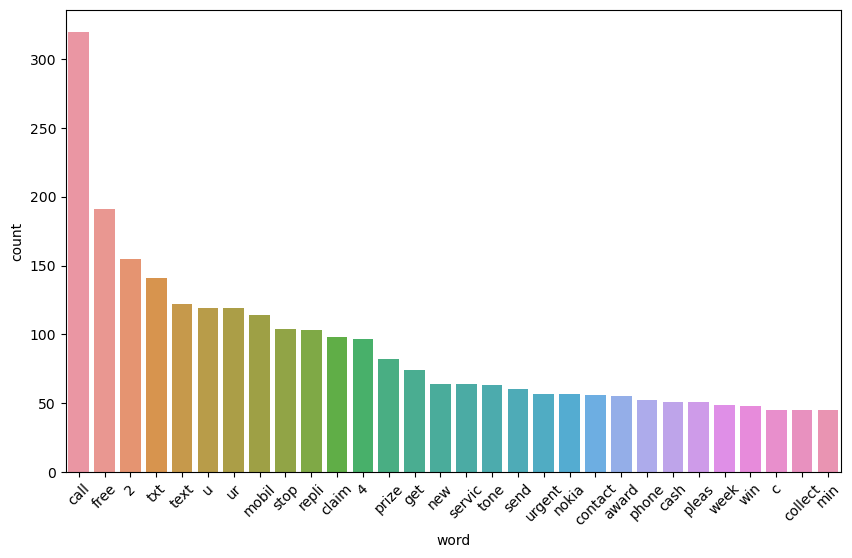

In [80]:
from collections import Counter

# Get the most common 30 words
most_common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_common_words)
# Rotate x labels for better visibility (optional)
plt.xticks(rotation=45)
plt.show()

## Top 30 Words used in Ham Messages

In [81]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

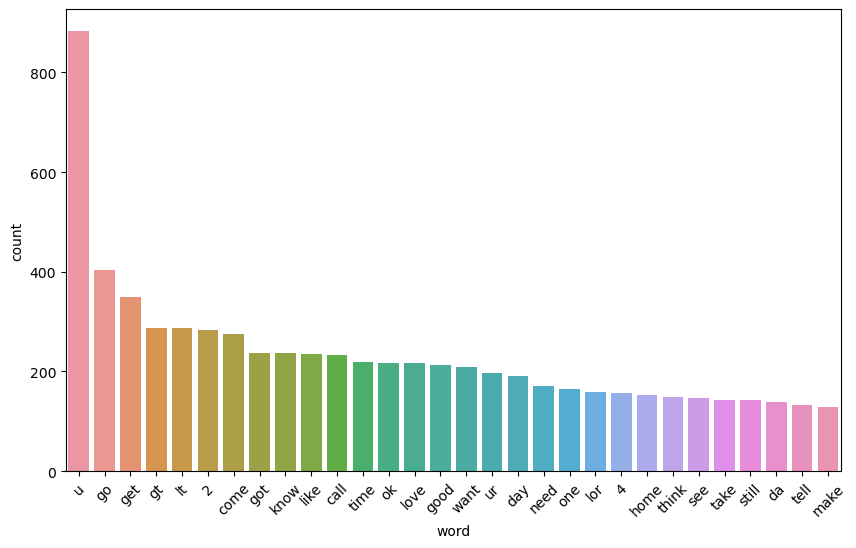

In [82]:
# Get the most common 30 words
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_common_words)
# Rotate x labels for better visibility (optional)
plt.xticks(rotation=45)
plt.show()

## Model building

### 1). Bag of Words Vectorization

In [83]:
## Method # 1:  we have used bag of words method to convert text into vectores

from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()

In [84]:
X = CV.fit_transform(df['transformed_text']).toarray()

In [85]:
X.shape

(5169, 6708)

In [86]:
y = df['target'].values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [88]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [89]:
gnb = GaussianNB()
mnb = BernoulliNB()
bnb = MultinomialNB()

In [90]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [91]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))



0.8684719535783365
0.5185185185185185
[[772 117]
 [ 19 126]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.52      0.87      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [92]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))



0.9661508704061895
0.9661016949152542
[[885   4]
 [ 31 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [93]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))



0.9738878143133463
0.8881578947368421
[[872  17]
 [ 10 135]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



### 2). Tfidf Vectorization


In [94]:
## Method # 2:  we have used tfidfs method to convert text into vectores

from sklearn.feature_extraction.text import TfidfVectorizer
cv2 = TfidfVectorizer()

In [95]:
X = cv2.fit_transform(df['transformed_text']).toarray()

In [96]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
y = df['target']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [99]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))



0.8636363636363636
0.5084033613445378
[[772 117]
 [ 24 121]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       889
           1       0.51      0.83      0.63       145

    accuracy                           0.86      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.86      0.88      1034



In [100]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))



0.9661508704061895
0.9661016949152542
[[885   4]
 [ 31 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [101]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))



0.9613152804642167
0.9906542056074766
[[888   1]
 [ 39 106]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.73      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



### Got Best results for TFIDF Vectorizer and BnB Naive Bayes Model

### Testing Other classifications models

In [159]:
#!pip install ensemble

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ensemble: filename=ensemble-0.0.dev1-py3-none-any.whl size=4433 sha256=0623d71a11387a8e56e6a85ad89e4b8ec791a360f111e018e57840b70f5d5dc3
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\66\10\32\ce1358364cd2e77d422aefbf8d1252ffd470f5c91d2245ff8e
  Created wheel for pysut: filename=pysut-1.1-py3-none-any.whl size=29086 sha256=963ecee051ed44b673cb4c6c2c1fa90d58ca5f1ea92d48c405e8a6320bdbb474
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\66\1a\8a\c6d683b2fa13b238ffc6bd337f107c74002df0bcaf0aad8848
Successfully built ensemble pysut


In [160]:
#!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 1.5 MB/s eta 0:00:00


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [103]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [104]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [105]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [106]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9465648854961832)

In [107]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9465648854961832
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9342359767891683
Precision -  0.808
For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395
For  RF
Accuracy -  0.9690522243713733
Precision -  0.991304347826087


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9477756286266924
Precision -  0.8421052631578947
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.97678916827853
Precision -  0.991869918699187
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9682539682539683


In [110]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.976789,0.991870
5,RF,0.969052,0.991304
2,NB,0.961315,0.990654
10,xgb,0.973888,0.968254
9,GBDT,0.950677,0.951923
0,SVC,0.972921,0.946565
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [116]:
import pickle
pickle.dump(cv2,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))